# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** Classification. There are only two possibilities either the student needs intervention or he dosent. 

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import f1_score
from sklearn.grid_search import GridSearchCV
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Read student data
student_data = pd.read_csv("student-data.csv")
print ("Student data read successfully!")

ImportError: No module named pandas

In [2]:
# Multiple outputs per line

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
n_students = student_data.shape[0]  
# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = student_data[student_data.passed=='yes'].shape[0] # or student_data.passed.value_counts()

# TODO: Calculate failing students
n_failed =student_data.shape[0]-n_passed

# TODO: Calculate graduation rate
grad_rate = (n_passed/n_students)*100

# Print the results
print( "Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print( "Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (X_all.head())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

## Gathering intuituion from the data  through Data Exploration and Visualization:

###  This is kind of obvious but  I expect the graduation rate to decrease for students who failed in atleast one class...

### Students who passed all the classes :

In [5]:
a=student_data[(student_data.failures==0) & (student_data.passed=='yes')].passed.value_counts()
b=student_data[(student_data.failures==0) & (student_data.passed=='no')].passed.value_counts()
a
b
100*a[0]/(a[0]+b[0])

yes    234
Name: passed, dtype: int64

no    78
Name: passed, dtype: int64

75.0

### Interpretation :
### 75% of the students who did not fail in a class, graduate succesfully.

### Students who failed in a class:

In [6]:
a=student_data[(student_data.failures> 0) & (student_data.passed=='yes')].passed.value_counts()
#Students who failed atleast one class
b=student_data[(student_data.failures> 0) & (student_data.passed=='no')].passed.value_counts()
a
b
100*a[0]/(a[0]+b[0])
#(float) b/(a+b)

yes    31
Name: passed, dtype: int64

no    52
Name: passed, dtype: int64

37.349397590361448

### Interpretation :

### Only 37% of  students who  failed in a class  graduate succesfully. (compared to 69 % overall). Thats the first sign of someone about to drop out.

### Students who failed more than one class..

In [7]:
a=student_data[(student_data.failures> 1) & (student_data.passed=='yes')].passed.value_counts()
b=student_data[(student_data.failures> 1) & (student_data.passed=='no')].passed.value_counts()
a
b
100*a[0]/(a[0]+b[0])

yes    7
Name: passed, dtype: int64

no    26
Name: passed, dtype: int64

21.212121212121211

### Interpretation :

###  Students who failed in two or more courses...21.2% graduation rate.

## Visualization

### 1.Number of past class failures  vs Students who Graduate / Drop-out

In [8]:
pf=pd.crosstab(student_data.failures,student_data.passed).plot(kind='bar')
plt.title('Number of past class failures  vs Students who Graduate / Drop-out')
plt.xlabel('number of past class failures ')
plt.ylabel('Frequency')
import matplotlib.patches as mpatches
plt.legend(('Dropout' ,'Graduate'))

### Interpretation :
### Most of the people who graduated succesfully have not  failed any classes. 


### Looking at the numbers 

In [9]:
pd.crosstab(student_data.failures,student_data.passed)

passed,no,yes
failures,,
0,78,234
1,26,24
2,14,3
3,12,4


### I also expect  alcohol consumption to  decrease graduation rate
### 2.Workday alcohol consumption  vs Students who Graduate / Drop-out

In [10]:
#pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
pd.crosstab(student_data.Dalc,student_data.passed).plot(kind='bar')
plt.title('Workday alcohol consumption   vs Students who Graduate / Drop-out')
plt.xlabel('Workday alcohol consumption ')
plt.ylabel('Frequency')
plt.legend(('Dropout' ,'Graduate'))

### Interpretation :
###  Most of the graduating students drink less alchol on Workdays.
### Another Interpretation from the bar chart:   More students graduate than droput so instead of looking at the height of the bars we can look at the ratio of  the bars. The ratio of Dropout/Graduate increases with alcohol consumption. 


### Looking at the numbers

In [11]:
pd.crosstab(student_data.passed,student_data.Dalc)

Dalc,1,2,3,4,5
passed,,,,,
no,83,31,9,5,2
yes,193,44,17,4,7


### 3.Extra paid classes within the course subject (Math or Portuguese)   vs Students who Graduate / Drop-out

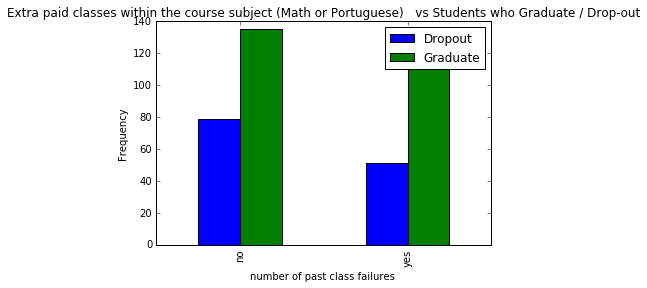

In [12]:
%matplotlib inline
pf=pd.crosstab(student_data.paid,student_data.passed).plot(kind='bar')
plt.title('Extra paid classes within the course subject (Math or Portuguese)   vs Students who Graduate / Drop-out')
plt.xlabel('number of past class failures ')
plt.ylabel('Frequency')
import matplotlib.patches as mpatches
plt.legend(('Dropout' ,'Graduate'))
pf

###  4.Student's sex

D:\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'D' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
D:\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
D:\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
D:\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#usin

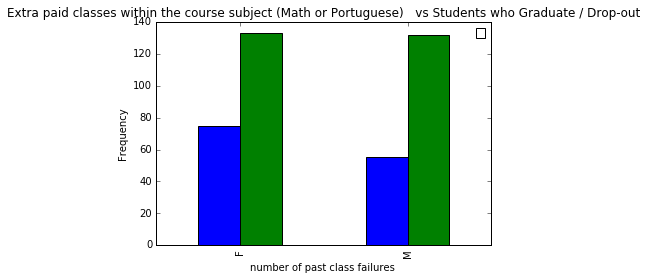

In [13]:
pf=pd.crosstab(student_data.sex,student_data.passed).plot(kind='bar')
plt.title('Extra paid classes within the course subject (Math or Portuguese)   vs Students who Graduate / Drop-out')
plt.xlabel('number of past class failures ')
plt.ylabel('Frequency')
import matplotlib.patches as mpatches
plt.legend('Dropout' ,'Graduate')
pf

In [14]:
pd.crosstab(student_data.sex,student_data.passed)

passed,no,yes
sex,,
F,75,133
M,55,132


### 5. Study Time 

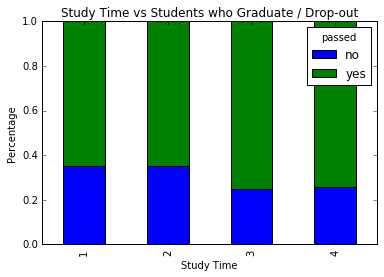

In [15]:
time=pd.crosstab(student_data.studytime,student_data.passed)
time.div(time.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Study Time vs Students who Graduate / Drop-out')
plt.xlabel('Study Time')
plt.ylabel('Percentage')

### Interpretation : Students who graduate study more.

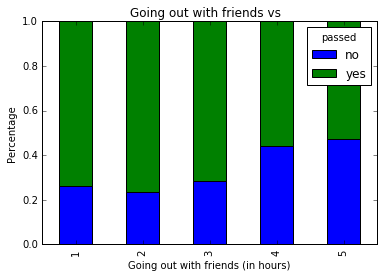

In [16]:
time=pd.crosstab(student_data.goout,student_data.passed)
time.div(time.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Going out with friends vs  ')
plt.xlabel('Going out with friends (in hours)')
plt.ylabel('Percentage')

### Interpretation :  Students who graduate spend less time with friends.

### 6.Number of School Absences

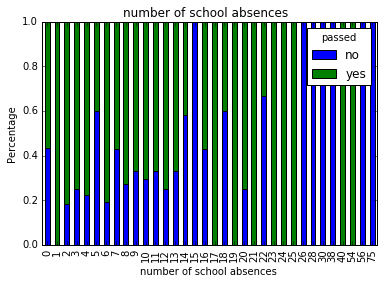

In [17]:
time=pd.crosstab(student_data.absences,student_data.passed)
time.div(time.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('number of school absences  ')
plt.xlabel('number of school absences ')
plt.ylabel('Percentage')

### Interpreatation : Students who drop out have high absence rates


### We preprocess 'student data' to convert all parameters to numerical values for groupby function used next

In [18]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

student_data = preprocess_features(student_data)
print ("Processed feature columns ({} total features):\n{}".format(len(student_data.columns), list(student_data.columns)))

Processed feature columns (49 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed']


## Groupby  helps us distinguish between passed=='yes' and passed=='no' groups
### Looking at the mean values of features. 

In [19]:
student_data.groupby('passed').mean()


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
passed,,,,,,,,,,,,,,,,,,,,,
0,0.869231,0.130769,0.576923,0.423077,17.023077,0.253846,0.746154,0.738462,0.261538,0.084615,...,0.900000,0.800000,0.400000,3.884615,3.261538,3.400000,1.553846,2.346154,3.684615,6.761538
1,0.890566,0.109434,0.501887,0.498113,16.535849,0.207547,0.792453,0.698113,0.301887,0.113208,...,0.973585,0.849057,0.301887,3.973585,3.222642,2.966038,1.445283,2.264151,3.490566,5.192453


###  We may see some differences but we cannot say if  the two groups are distinctly different or accidentaly different.( We need a T-test maybe)

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [20]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [21]:
# TODO: Import any additional functionality you may need here
from sklearn import cross_validation

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above

rs = cross_validation.ShuffleSplit(395, n_iter=1,test_size=95, random_state=0)
for train_index, test_index in rs:
    #print("TRAIN:", train_index, "TEST:", test_index
    X_train = X_all.loc[train_index,]
    X_test = X_all.loc[test_index,]
    y_train = y_all.loc[train_index,]
    y_test = y_all.loc[test_index,]
    
    
#X_train,X_test,y_train,y_test=train_test_split(X_all,y_all,test_size=num_train,random_state=4)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

y_train.index


Training set has 300 samples.
Testing set has 95 samples.


Int64Index([ 63, 245, 154, 311,  81, 344, 336, 124, 250,  89,
            ...
            211,   9, 359, 195, 251, 323, 192, 117,  47, 172],
           dtype='int64', length=300)

## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer:**
### 1)  Logistic Regression
This  would be the first technique I would start with for a binary classification problem because of its simplicity.
#### Advantages of logistic regression:
* It provides a probabality score that is easily interpretable and the classification threshold can be set based on the problem.
* It is also pretty robust to noise and you can avoid overfitting. 
* In this case where you see 30 features most of the features possibly dont contribute anything to the outcome and this is where we can attempt to make the coefficents(beta) of these non-contributing features to '0' through  feature selection using L2 or L1 regularization

####  Disadvantages of logistic regression:
* Performance is (generally) not competitive with SVM, Boosting
* Can't automatically learn feature interactions







###  2) Support Vector Machines
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.



### 3.)KNN
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree.).
Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits or satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

* Source-https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms
  http://www.dataschool.io/comparing-supervised-learning-algorithms/

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [22]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))
   # print("Accuracy/Correctly Classified: {:.4f}.".format(metrics.accuracy_score(y_test, predicted)))

In [23]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.linear_model import LogisticRegression
# from sklearn import model_B
from sklearn.svm import SVC
# from skearln import model_C
from sklearn.neighbors import KNeighborsClassifier


from sklearn.cross_validation import cross_val_score
# TODO: Initialize the three models
clf_A = LogisticRegression()
clf_B = SVC()
clf_C = KNeighborsClassifier(n_neighbors=25,weights='uniform')

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size


### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

###  Logistic Regression-100 training points

In [24]:
from sklearn.metrics import f1_score
from time import time
train_predict(clf_A,X_train_100 ,y_train_100, X_test, y_test)

Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8571.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7612.


###  Logistic Regression-200 training points

In [25]:
train_predict(clf_A, X_train[:200], y_train[:200], X_test, y_test)

Training a LogisticRegression using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8380.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7794.


###  Logistic Regression-300 training points

In [26]:
train_predict(clf_A, X_train, y_train, X_test, y_test)

Training a LogisticRegression using a training set size of 300. . .
Trained model in 0.0030 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8381.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7910.


### Logistic Regression PLOTS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

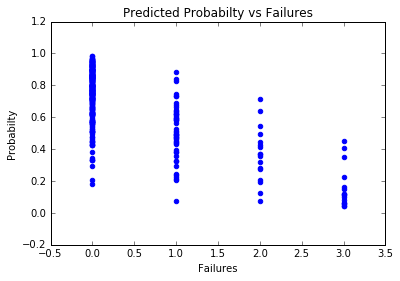

In [27]:
# plot the predicted probabilities 
#plt.scatter(student_data.age,student_data.passed)
clf_A.fit(X_train, y_train)
student_data['pred_prob'] = clf_A.predict_proba(X_all)[:, 1]
plt.scatter(student_data.failures, student_data.pred_prob, color='blue')
plt.xlabel('Failures')
plt.ylabel('Probabilty')
plt.title('Predicted Probabilty vs Failures')

### Interpretation: Low probabilty to graduate for students with high past class failures

### Logistic Regression plots with Categorical Features

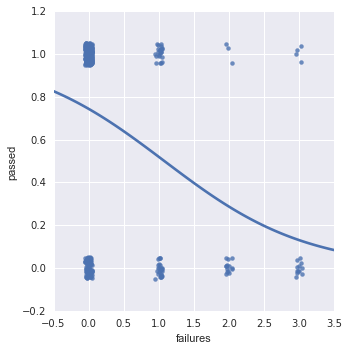

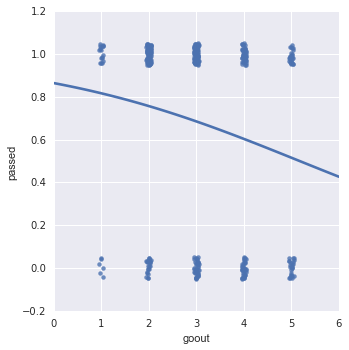

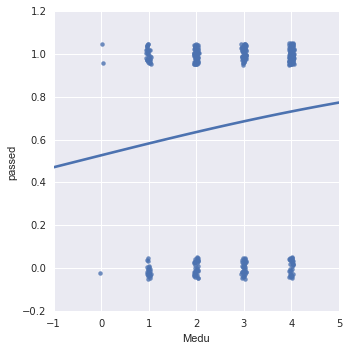

In [28]:
import seaborn as sns
sns.lmplot(x='failures', y='passed', data=student_data, ci=None, logistic=True,x_jitter=0.05, y_jitter=0.05)
sns.lmplot(x='goout', y='passed', data=student_data, ci=None, logistic=True,x_jitter=0.05, y_jitter=0.05)
sns.lmplot(x='Medu', y='passed', data=student_data, ci=None, logistic=True,x_jitter=0.05, y_jitter=0.05)

### Jitter gives an idea of concentartion( number of students) at each point

### PLOTTING LEARNING CURVES
Reference:http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


### GRID SEARCH CV for better model accuracy
* Using grid search to find out the best C value. 
* C= Inverse of regularization strength.Smaller values specify stronger regularization

Reference: http://stackoverflow.com/questions/21816346/fine-tuning-parameters-in-logistic-regression
http://courses.cs.washington.edu/courses/cse599c1/13wi/slides/l2-regularization-online-perceptron.pdf

In [30]:
from sklearn import grid_search
clfA1=grid_search.GridSearchCV(cv=10,estimator=LogisticRegression(C=1.0,penalty='l2'),
       param_grid={'C':[0.01,0.02,0.03,0.04,0.05,0.5,0.725,0.712,0.723,0.727,1,1000]},n_jobs=-1)
clfA1.fit(X_train,y_train)
print (clfA1.best_params_)
print (clfA1.best_score_)
train_predict(clfA1, X_train, y_train, X_test, y_test)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.5, 0.725, 0.712, 0.723, 0.727, 1, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

{'C': 0.04}
0.71
Training a GridSearchCV using a training set size of 300. . .
Trained model in 4.7550 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8323.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7943.


### The 'C' value range was narrowed manually to improve F-score

## Comparing Performance of untuned and tuned model

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

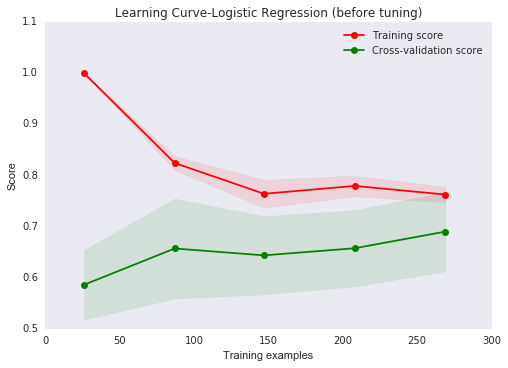

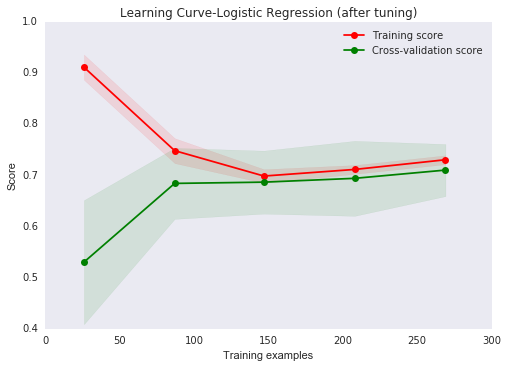

In [31]:
from sklearn.learning_curve import learning_curve
plot_learning_curve(LogisticRegression(),X= X_train.values, y= y_train.values,title= 'Learning Curve-Logistic Regression (before tuning)',cv=10)
plot_learning_curve(clfA1.best_estimator_,X= X_train.values, y= y_train.values,title= 'Learning Curve-Logistic Regression (after tuning)',cv=10)

### Interpretation :
* Final accuracy is (almost) same in both models.
* Overfitting is seen in the first model. The gap between the Training annd Validation score is really high in the first case.
This model will not genralize very well.
* Training and validation score converge using less than 100 training points in the second case. 
* Tuning the parameters leads to a better model

## Support Vector Machines

###  SVM-100 Training points

In [32]:
train_predict(clf_B,X_train_100 ,y_train_100, X_test, y_test)

Training a SVC using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8591.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7838.


### SVM-200 Training points

In [33]:
train_predict(clf_B,X_train_200 ,y_train_200, X_test, y_test)

Training a SVC using a training set size of 200. . .
Trained model in 0.0156 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8693.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7755.


###  SVM- 300 Training points

In [ ]:
train_predict(clf_B,X_train_300 ,y_train_300, X_test, y_test)

Training a SVC using a training set size of 300. . .
Trained model in 0.0156 seconds
Made predictions in 0.0156 seconds.
F1 score for training set: 0.8692.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7586.


### GRID SEARCH CV for better model accuracy

In [ ]:
param_grids = {"kernel":['linear','rbf'],
               'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
               'C': [1, 10, 100, 200, 300, 400, 500, 600, 700],
               'tol':[1e-3, 1e-4, 1e-5, 1e-6]}

clf_B1 = GridSearchCV(SVC(), param_grid= param_grids, cv=10,n_jobs= -1)
clf_B1.fit(X_train,y_train)

In [ ]:
#Best Parameters
clf_B1.best_score_
clf_B1.best_params_
train_predict(clf_B1,X_train_300 ,y_train_300, X_test, y_test)

## Comparing Performance of untuned and tuned model

In [ ]:
plot_learning_curve(SVC(),X= X_train.values, y= y_train.values,title= 'Learning Curve- SVM (before tuning) ',cv=10)
plot_learning_curve(clf_B1.best_estimator_,X= X_train.values, y= y_train.values,title= 'Learning Curve SVM (after tuning)',cv=10)

### Interpretation :
* Again Tuned Model is better for same reasons as logistic regression.

###  K-nearest neighbors

### KNN- 100 training points

In [ ]:
train_predict(clf_C,X_train_100 ,y_train_100, X_test, y_test)

### KNN- 200 training points

In [ ]:
train_predict(clf_C,X_train_200 ,y_train_200, X_test, y_test)

### KNN- 300 training points

In [ ]:
train_predict(clf_C,X_train_300 ,y_train_300, X_test, y_test)

### GRID SEARCH CV for better model accuracy

In [ ]:
k_range=list(range(1,31))
weight_options=['uniform','distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
clf_C1=GridSearchCV(clf_C,param_grid=param_grid,cv=10,scoring='accuracy',n_jobs=-1)
clf_C1.fit(X_train,y_train)
train_predict(clf_C1,X_train_300 ,y_train_300, X_test, y_test)

## Comparing Performance of untuned and tuned model

In [ ]:
plot_learning_curve(KNeighborsClassifier(),X= X_train.values, y= y_train.values,title= 'Learning Curve',cv=10)
plot_learning_curve(clf_C1.best_estimator_,X= X_train.values, y= y_train.values,title= 'Learning Curve',cv=10)

### Interpretation:
* Overfitting avoided through tuning
* Tuned model has low variance from zero training points
* Tuned model has constantly increasing accuracy

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Logistic Regression**  

| Training Set Size |           Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |0.0020 seconds           |000 seconds             |0.8000            |  0.7153
| 200               |0.0030 seconds           |0.0010 seconds          |0.8269            |  0.7770
| 300               |0.0040 seconds           |0.0210 seconds          |0.8474            |  0.7801


** Classifer 2 - SVM**  

| Training Set Size |    Training Time        | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |  0.0020 seconds         |    0.0010 seconds      |  0.8750          | 0.7662          |                      
| 200               |  0.0050 seconds         |    0.0020 seconds      |  0.8771          | 0.7632          |
| 200               |  0.0080 seconds         |    0.0060 seconds      |  0.8712          | 0.7632          |

** Classifer 3 - KNN**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |  0.0030 seconds         | 0.0030 seconds         |   0.7722         |  0.7949         | 
| 200               |  0.0020 seconds         | 0.0030 seconds         |   0.8000         |   0.7613        |
| 300               |  0.0010 seconds         | 0.0040 seconds         |    0.8286        |   0.7898        |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **  
### KNN

#### Criterion:
* **TIME-** All the chosen models take time in thousandth of a second. If there are only 395 students time should not be the limiting criterion.
* ** PERFORMANCE**

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [ ]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = None

# TODO: Initialize the classifier
clf = None

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
#grid_obj =GridSearchCV(clf_C,param_grid=param_grid,cv=10,scoring=f1_scorer)
#grid_obj= GridSearchCV(SVC(), param_grid= param_grids, cv=15,n_jobs= -1,scoring=f1_scorer)
# TODO: Fit the grid search object to the training data and find the optimal parameters
#grid_obj.fit(X_train,y_train)
grid_obj=GridSearchCV(cv=10,estimator=LogisticRegression(C=1.0,penalty='l2'),
       param_grid={'C': [0.08521,0.0852,0.08525,0.08524,0.08255,0.0856,0.0857,0.0858,0.0859]},n_jobs=-1,scoring=f1_scorer)
grid_obj.fit(X_train,y_train)
# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print( "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.